In [1]:
# import modules
import pandas as pd
import numpy as np
import ast
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams

C:\Users\altz7\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("variance_test.csv")
df1 = pd.read_csv("overide_key.csv")

In [4]:
sku_start = df['sku'].to_list()
sku_overide = df1['sku'].to_list()

In [7]:
not_present_sku_list = []

for item in sku_overide:
    if item not in sku_start:
        not_present_sku_list.append(item)

In [8]:
print(not_present_sku_list)

[16403240, 18993223, 16350577, 16550523, 16550540, 19993023, 19993040, 17351201, 17351223, 17350101, 17350123, 17351601, 17351623, 17352201, 17352223, 17352101, 17352123, 19503268, 19503275]


In [2]:
#upload data
df = pd.read_csv("doc_reports.csv")
df1 = pd.read_csv("facial_similarity_reports.csv")

In [48]:
df1_clear = df.loc[df['result'] == "clear"]

In [4]:
# exctract values from "properties" column

dictionary_value_list = []
for i in range(len(df.index)):
    y = ast.literal_eval(df["properties"][i])
    dictionary_value_list.append(y)

gender_list = []
nationality_list = []
document_type_list = []
date_of_expiry_list = []
issuing_country_list = []

for i in dictionary_value_list:
    gender_list.append(i.get('gender', 0))
    nationality_list.append(i.get('nationality', 0))
    document_type_list.append(i.get('document_type', 0))
    date_of_expiry_list.append(i.get('date_of_expiry', 0))
    issuing_country_list.append(i.get('issuing_country', 0))

df['gender'] = gender_list
df['nationality'] = nationality_list
df['document_type'] = document_type_list
df['date_of_expiry'] = date_of_expiry_list
df['issuing_country'] = issuing_country_list

In [53]:
#count number of duplicates on a particular column
print(len(df['user_id'])-len(df['user_id'].drop_duplicates()))

33680


In [54]:
# create a dataframe for counting - how much particular ID appers in dataset

dupl_pivot = df.pivot_table(index=['user_id'], aggfunc='size')

dupl_pivot_df = pd.DataFrame({'ID':dupl_pivot.index, 'Count':dupl_pivot.values})

dupl_pivot_df_3 = dupl_pivot_df.loc[dupl_pivot_df['Count'] > 5] # number 5 here is a number control occurance
print(dupl_pivot_df_3)

In [6]:
#select rows with particluar values
df_consider = df.loc[df['result'] == "consider"]
df_clear = df.loc[df['result'] == "clear"]

In [ ]:
#Sub-results for image_integrity_results - "Consider"

In [40]:
df_consider_image_quality_result = df_consider.loc[df_consider['image_integrity_result'] == "consider"]

df_consider_image_quality_result_count = df_consider_image_quality_result[["supported_document_result",
                                                                           "image_quality_result",
                                                                           "colour_picture_result",
                                                                           "conclusive_document_quality_result"]].apply(pd.Series.value_counts)

df_consider_image_quality_result_count = df_consider_image_quality_result_count.fillna(0)
df_consider_image_quality_result_count = df_consider_image_quality_result_count.astype(int)

df_consider_image_quality_result_count.reset_index(level=0, inplace=True)

df4 = pd.melt(df_consider_image_quality_result_count, id_vars=['index'], value_vars = ["supported_document_result",
                                                                           "image_quality_result",
                                                                           "colour_picture_result",
                                                                           "conclusive_document_quality_result"])

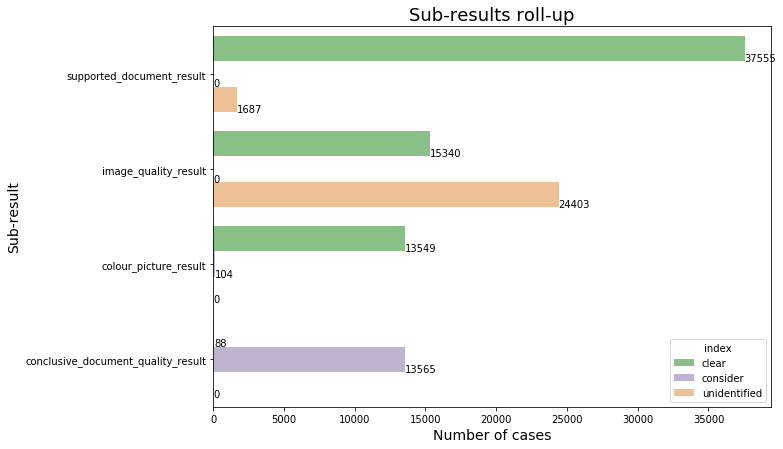

In [45]:
# plot for #Sub-results for image_integrity_results - "Consider"

rcParams["figure.figsize"] = 10,7
ax = sns.barplot(y='variable', x='value', hue="index", data = df4, palette="Accent")
#labelling each bar with values
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax, "h", 0.3)
#set labels for chart
ax.set_title("Sub-results roll-up", fontsize=18)
ax.set_xlabel("Number of cases", fontsize=14)
ax.set_ylabel("Sub-result", fontsize=14)

ax.figure.savefig('Sub-results for image_integrity_result-parent.png', bbox_inches="tight")

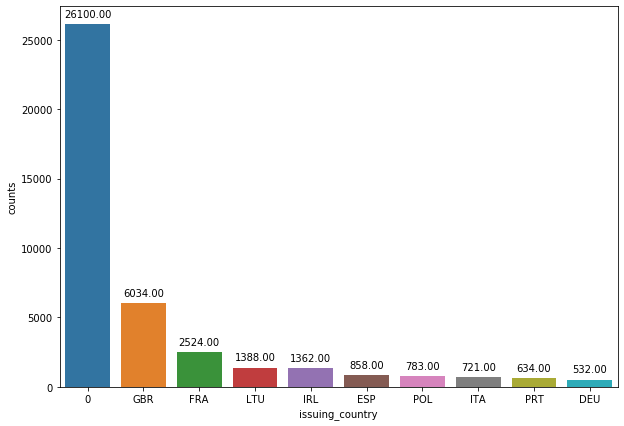

In [7]:
# selecting data and plotting for "issuing_country" with "consider" status

issuing_country_consider = df_consider.groupby(["issuing_country", "result"]).size().reset_index(name='counts')
issuing_country_consider.sort_values(by=['counts'], ascending=False, inplace=True)

plt.figure(figsize=(10,7))

#add number to each bar
splot = sns.barplot(data=issuing_country_consider[0:10], x="issuing_country", y="counts")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('issuing_country_consider.png', bbox_inches='tight', transparent=True, dpi=200)

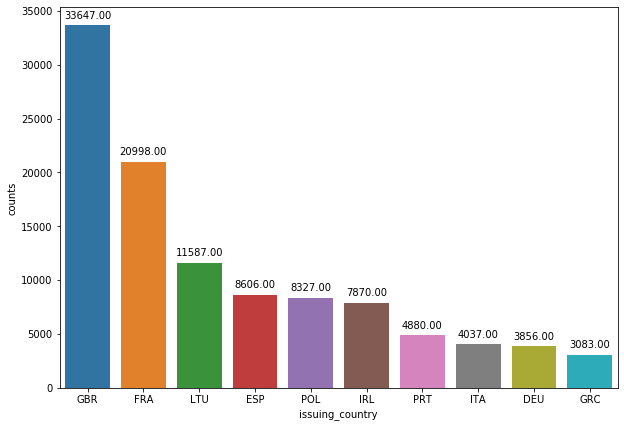

In [9]:
# selecting data and plotting for "issuing_country" with "clear" status

issuing_country_clear = df_clear.groupby(["issuing_country", "result"]).size().reset_index(name='counts')
issuing_country_clear.sort_values(by=['counts'], ascending=False, inplace=True)

plt.figure(figsize=(10,7))

#add number to each bar
splot = sns.barplot(data=issuing_country_clear[0:10], x="issuing_country", y="counts")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('issuing_country_clear.png', bbox_inches='tight', transparent=True, dpi=200)

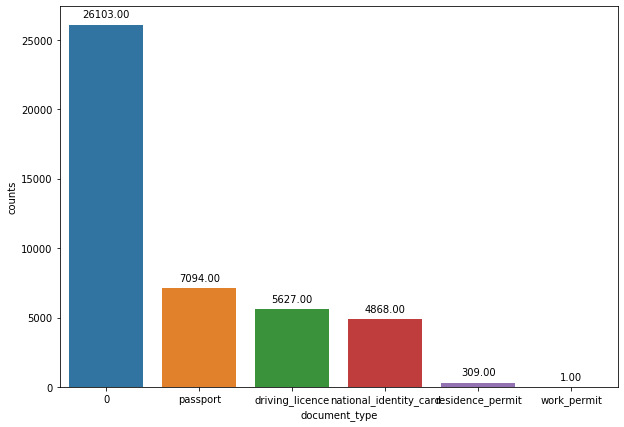

In [8]:
# selecting data and plotting for "document_type_clear" with "consider" status

document_type_consider = df_consider.groupby(["document_type", "result"]).size().reset_index(name='counts')
document_type_consider.sort_values(by=['counts'], ascending=False, inplace=True)

plt.figure(figsize=(10,7))

#add number to each bar
splot = sns.barplot(data = document_type_consider[0:10], x="document_type", y="counts")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('document_type_consider.png', bbox_inches='tight', transparent=True, dpi=200)

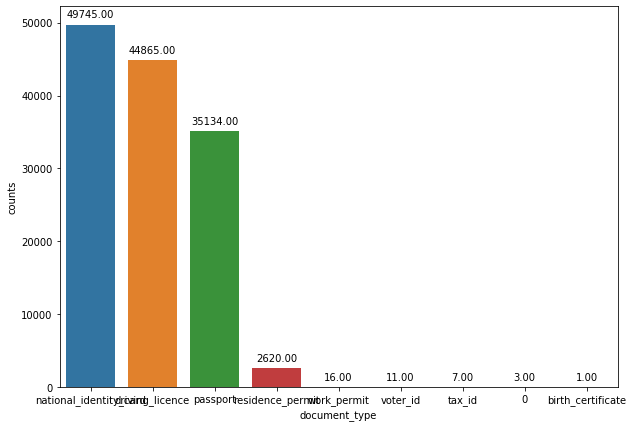

In [12]:
# selecting data and plotting for "document_type_clear" with "clear" status

document_type_clear = df_clear.groupby(["document_type", "result"]).size().reset_index(name='counts')
document_type_clear.sort_values(by=['counts'], ascending=False, inplace=True)

plt.figure(figsize=(10,7))

#add number to each bar
splot = sns.barplot(data = document_type_clear[0:10], x="document_type", y="counts")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('document_type_clear.png', bbox_inches='tight', transparent=True, dpi=200)

In [31]:
reason_consider = df_consider[df_consider == 'consider'].count()
reason_consider.sort_values(ascending=False, inplace=True)

C:\Users\altz7\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


result                                44002
image_integrity_result                39743
conclusive_document_quality_result    13565
visual_authenticity_result             3030
data_validation_result                 1614
face_detection_result                   574
data_consistency_result                 170
data_comparison_result                  162
colour_picture_result                   104
police_record_result                     25
compromised_document_result              23
supported_document_result                 0
user_id                                   0
image_quality_result                      0
created_at                                0
issuing_country                           0
date_of_expiry                            0
attempt_id                                0
properties                                0
sub_result                                0
gender                                    0
nationality                               0
document_type                   

In [32]:
#selecting data for factors that determine "Consider" status

reason_consider = df_consider[df_consider == 'consider'].count()
reason_consider.sort_values(ascending=False, inplace=True)

#Convert Series to DF. Create a dict and pass this as the data param to the dataframe constructor
reason_consider_df = pd.DataFrame({'Consider_reason':reason_consider.index, 'Count':reason_consider.values})

#remove "user_id" value from dataframe
reason_consider_df = reason_consider_df[reason_consider_df.Consider_reason != 'user_id']

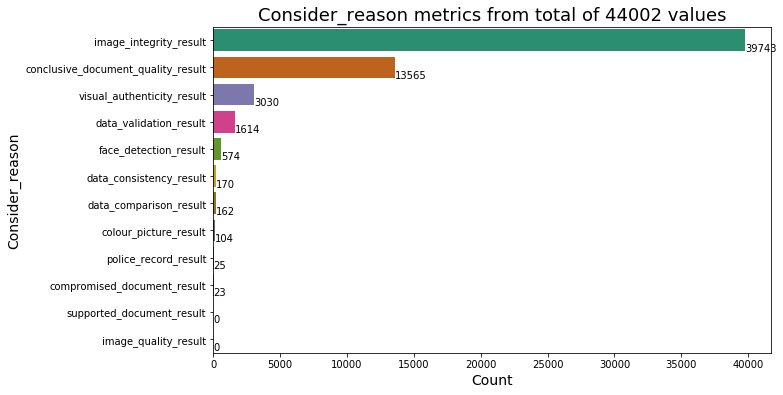

In [12]:
#Plot for Consider_reason metrics

rcParams["figure.figsize"] = 10,6

ax = sns.barplot(x='Count', y='Consider_reason', data = reason_consider_df[1:13], palette="Dark2")
ax.set_title("Consider_reason metrics from total of 44002 values", fontsize=18)
ax.set_xlabel("Count", fontsize=14)
ax.set_ylabel("Consider_reason", fontsize=14)

#display values for each bar
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax, "h", 0.3)

ax.figure.savefig('Consider_reason metrics from total of 44002 values.png', bbox_inches="tight")

In [ ]:
#Selecting data for Pass rates calculation

In [38]:
result_time = df.groupby(["created_at", "result"]).size().reset_index(name='counts')

result_time_1 = df1.groupby(["created_at", "result"]).size().reset_index(name='counts')

In [39]:
# converting date-time into date format

date_list = []

for i in range(len(result_time.index)):
    date_list.append(result_time["created_at"][i][0:10])
    
date_list_1 = []

for i in range(len(result_time_1.index)):
    date_list_1.append(result_time_1["created_at"][i][0:10])

In [40]:
result_time["created_at_date"] = date_list

result_time_1["created_at_date"] = date_list_1

In [41]:
result_time_dateagg = result_time.groupby(["created_at_date", "result"]).size().reset_index(name='counts')
result_time_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

result_time_dateagg_1 = result_time_1.groupby(["created_at_date", "result"]).size().reset_index(name='counts')
result_time_dateagg_1.sort_values(by=['created_at_date'], ascending=True, inplace=True)

In [42]:
time_p = result_time_dateagg.pivot(index='created_at_date', columns='result', values='counts')

time_p_1 = result_time_dateagg_1.pivot(index='created_at_date', columns='result', values='counts')

In [43]:
time_p = time_p.fillna(0)
time_p_1 = time_p_1.fillna(0)

In [44]:
time_p['clear'] = time_p['clear'].astype(np.int64)
time_p['consider'] = time_p['consider'].astype(np.int64)

time_p_1['clear'] = time_p_1['clear'].astype(np.int64)
time_p_1['consider'] = time_p_1['consider'].astype(np.int64)

In [45]:
time_p["rate"] = ((time_p["clear"] * 100) / (time_p["clear"] + time_p["consider"])).round(2)

time_p_1["rate"] = ((time_p_1["clear"] * 100) / (time_p_1["clear"] + time_p_1["consider"])).round(2)

In [46]:
time_p["rate_2"] = ((time_p["rate"] + time_p_1["rate"]) / 2).round(2)

In [47]:
#moving average
time_p["rate_moving"] = time_p['rate'].rolling(window=2).mean()

time_p["rate_2_moving"] = time_p['rate_2'].rolling(window=2).mean()

time_p_1["rate_moving"] = time_p_1['rate'].rolling(window=2).mean()


In [ ]:
time_p["rate_moving"][0] = time_p["rate"][0]

time_p["rate_2_moving"][0] = time_p["rate_2"][0]

time_p_1["rate_moving"][0] = time_p_1["rate"][0]

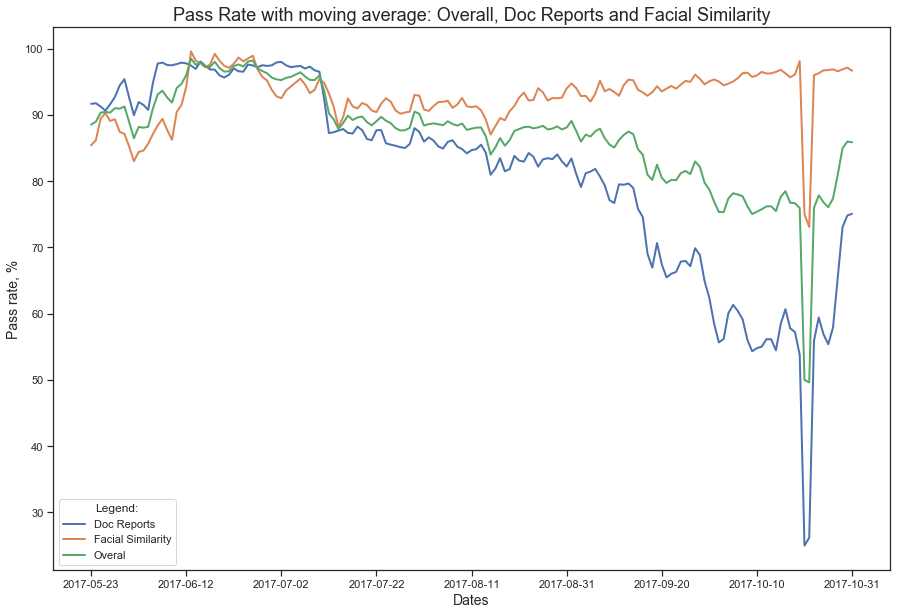

In [52]:
#create chart size FOR MOVING AVERAGE

rcParams["figure.figsize"] = 15,10

#Control width of lines - 0,5 thick, 2 and more - wide
sns.set(style="ticks", rc={"lines.linewidth": 2})

#If you like the chart on GREY background
#sns.set_style("darkgrid")

#create chart
# Change color palette: here is available pallets: https://www.codecademy.com/articles/seaborn-design-ii#targetText=Seaborn%20has%20six%20variations%20of,bright%20%2C%20dark%20%2C%20and%20colorblind%20
ax = sns.lineplot(y='rate_moving', x = time_p.index, data = time_p, palette="Dark2", legend=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax1 = sns.lineplot(y='rate_moving', x = time_p_1.index, data = time_p_1, palette="Dark2", legend=False)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2 = sns.lineplot(y='rate_2_moving', x = time_p.index, data = time_p, palette="Dark2", legend=False)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

#set labels for chart
ax.set_title("Pass Rate with moving average: Overall, Doc Reports and Facial Similarity", fontsize=18)
ax.set_xlabel("Dates", fontsize=14)
ax.set_ylabel("Pass rate, %", fontsize=14)

plt.legend(title='Legend:', loc='lower left', labels=['Doc Reports', 'Facial Similarity', "Overal"])

#ax.set(xlim=(125, 140))
ax.figure.savefig('Overall Pass Rate for Doc Reports and Facial Similarity - MovAver.png', bbox_inches="tight")

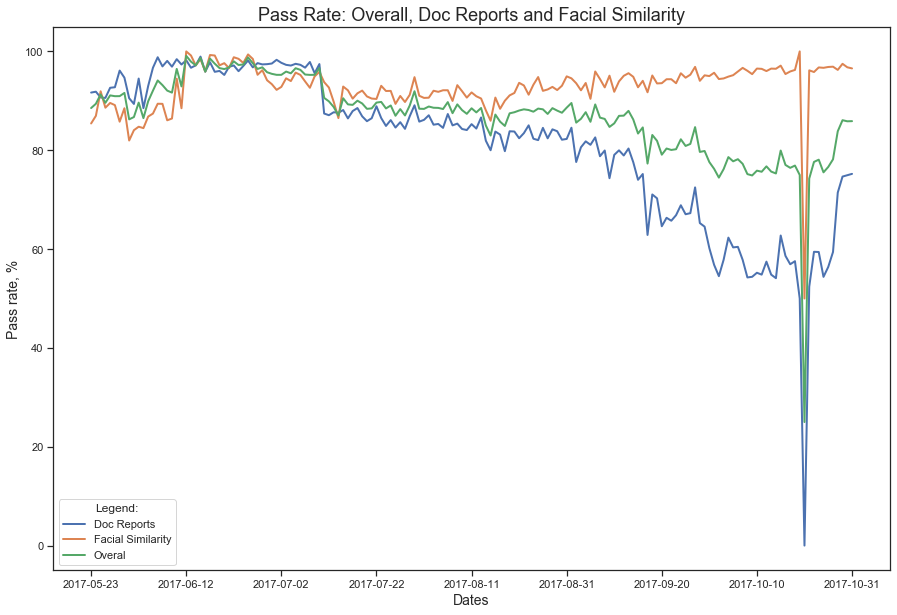

In [30]:
#create chart size
rcParams["figure.figsize"] = 15,10

#Control width of lines - 0,5 thick, 2 and more - wide
sns.set(style="ticks", rc={"lines.linewidth": 2})

#If you like the chart on GREY background
#sns.set_style("darkgrid")

#create chart
# Change color palette: here is available pallets: https://www.codecademy.com/articles/seaborn-design-ii#targetText=Seaborn%20has%20six%20variations%20of,bright%20%2C%20dark%20%2C%20and%20colorblind%20
ax = sns.lineplot(y='rate', x = time_p.index, data = time_p, palette="Dark2", legend=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax1 = sns.lineplot(y='rate', x = time_p_1.index, data = time_p_1, palette="Dark2", legend=False)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2 = sns.lineplot(y='rate_2', x = time_p.index, data = time_p, palette="Dark2", legend=False)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

#set labels for chart
ax.set_title("Pass Rate: Overall, Doc Reports and Facial Similarity", fontsize=18)
ax.set_xlabel("Dates", fontsize=14)
ax.set_ylabel("Pass rate, %", fontsize=14)

plt.legend(title='Legend:', loc='lower left', labels=['Doc Reports', 'Facial Similarity', "Overal"])

#ax.set(xlim=(125, 140))
ax.figure.savefig('Overall Pass Rate for Doc Reports and Facial Similarity.png', bbox_inches="tight")


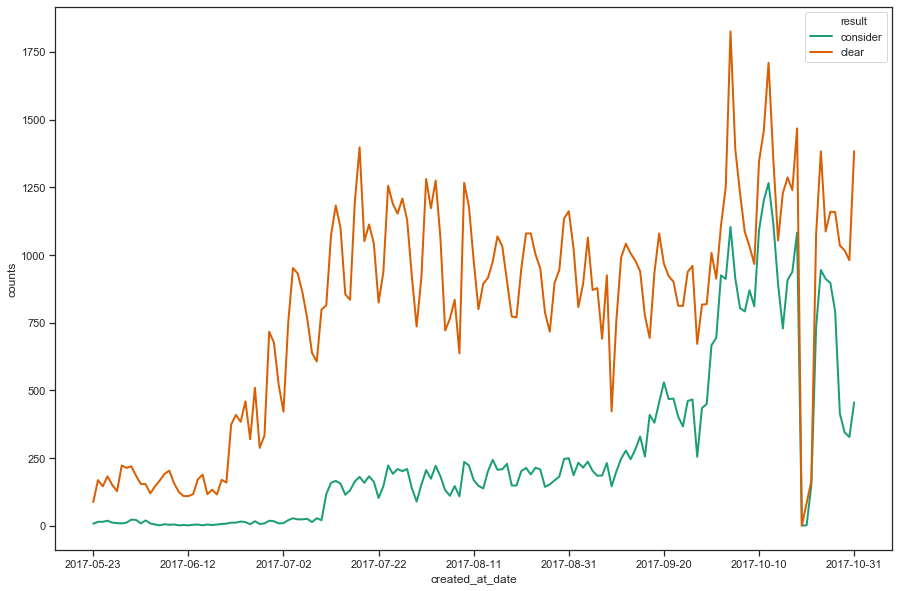

In [15]:
#create chart size for Consider / Clear metric
rcParams["figure.figsize"] = 15,10

#Control width of lines - 0,5 thick, 2 and more - wide
sns.set(style="ticks", rc={"lines.linewidth": 2})

#If you like the chart on GREY background
#sns.set_style("darkgrid")

#create chart
# Change color palette: here is available pallets: https://www.codecademy.com/articles/seaborn-design-ii#targetText=Seaborn%20has%20six%20variations%20of,bright%20%2C%20dark%20%2C%20and%20colorblind%20
ax = sns.lineplot(y='counts', x='created_at_date', hue='result', data = result_time_dateagg, palette="Dark2")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
#ax.set(xlim=(125, 140))
ax.figure.savefig('Clear-Consider results comparison over Date range.png', bbox_inches="tight")

In [37]:
#value_counts - multiple columns
subresults_type_consider = df_consider[["image_integrity_result",
                                        "image_quality_result",
                                        "conclusive_document_quality_result",
                                       "visual_authenticity_result",
                                       "data_validation_result",
                                       "face_detection_result",
                                       "data_consistency_result",
                                       "data_comparison_result",
                                       "colour_picture_result",
                                       "police_record_result",
                                       "compromised_document_result",
                                       "supported_document_result"]].apply(pd.Series.value_counts)

In [38]:
subresults_type_consider = subresults_type_consider.fillna(0)
subresults_type_consider = subresults_type_consider.astype(int)

In [39]:
subresults_type_consider.reset_index(level=0, inplace=True)

In [40]:
df3 = pd.melt(subresults_type_consider, id_vars=['index'], value_vars = ['image_integrity_result', 'conclusive_document_quality_result',
       'visual_authenticity_result', 'data_validation_result',
       'face_detection_result', 'data_consistency_result',
       'data_comparison_result', 'colour_picture_result',
       'police_record_result', 'compromised_document_result',
       'supported_document_result', "image_quality_result",])

In [43]:
# creating correlations
corrMatrix = subresults_type_consider.corr()
print(corrMatrix)

                                    image_integrity_result  \
image_integrity_result                            1.000000   
image_quality_result                             -0.996029   
conclusive_document_quality_result                0.996146   
visual_authenticity_result                       -0.229628   
data_validation_result                           -0.326969   
face_detection_result                            -0.386342   
data_consistency_result                          -0.401101   
data_comparison_result                            0.993341   
colour_picture_result                            -0.407983   
police_record_result                             -0.411962   
compromised_document_result                      -0.411476   
supported_document_result                        -0.445287   

                                    image_quality_result  \
image_integrity_result                         -0.996029   
image_quality_result                            1.000000   
conclusive_do

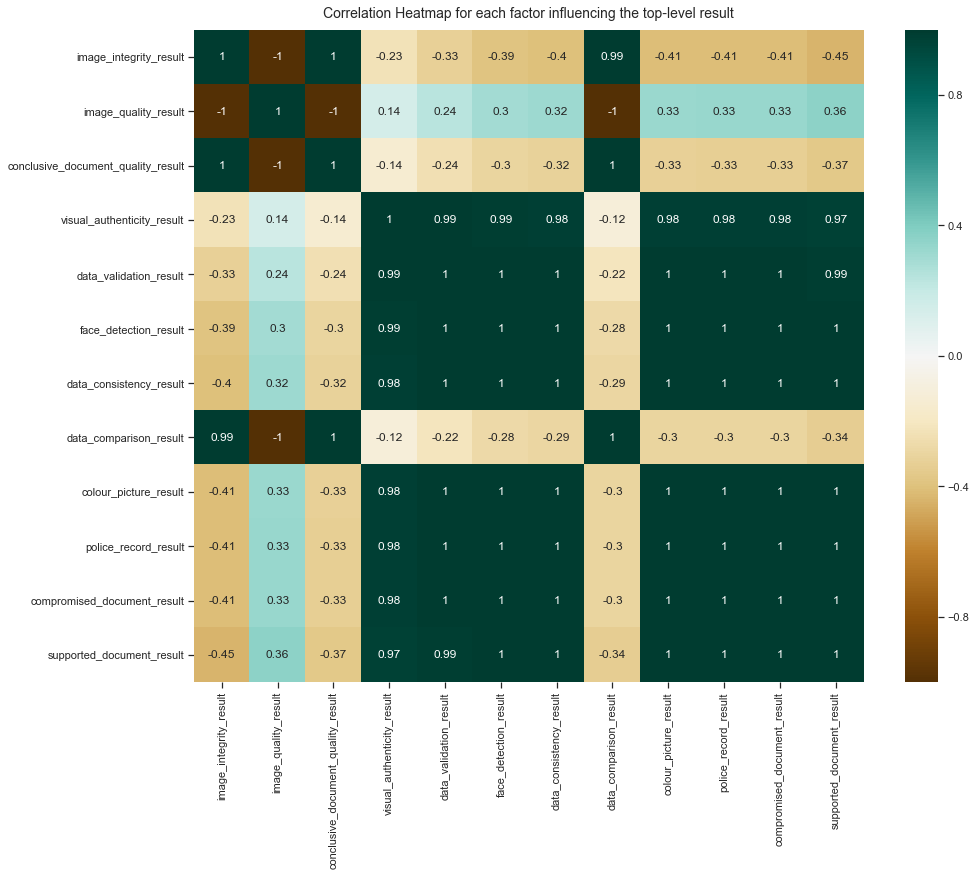

In [63]:
# Plot for correlation
plt.figure(figsize=(15, 12))
ax = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True, cmap='BrBG')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
ax.set_title('Correlation Heatmap for each factor influencing the top-level result', fontdict={'fontsize':14}, pad=12)
ax.figure.savefig('Correlation for each factor influencing the top-level result.png', bbox_inches="tight")

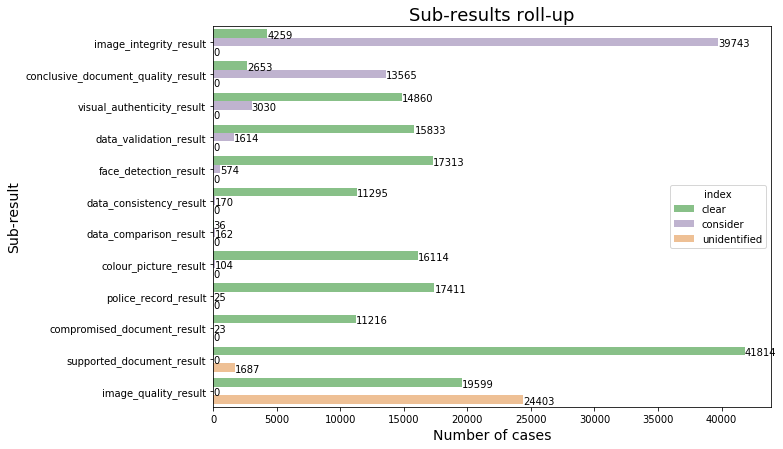

In [39]:
# Plot for Subresults roll-up

rcParams["figure.figsize"] = 10,7
ax = sns.barplot(y='variable', x='value', hue="index", data = df3, palette="Accent")
#labelling each bar with values
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax, "h", 0.3)
#set labels for chart
ax.set_title("Sub-results roll-up", fontsize=18)
ax.set_xlabel("Number of cases", fontsize=14)
ax.set_ylabel("Sub-result", fontsize=14)

ax.figure.savefig('Sub-results roll-up.png', bbox_inches="tight")

In [ ]:
#rate of failure/consider for each factor

In [73]:
# image_integrity_result
image_integrity_result = df.groupby(["created_at", "image_integrity_result"]).size().reset_index(name='counts')

date_list_image_integrity = []

for i in range(len(image_integrity_result.index)):
    date_list_image_integrity.append(image_integrity_result["created_at"][i][0:10])

image_integrity_result["created_at_date"] = date_list_image_integrity

image_integrity_result_dateagg = image_integrity_result.groupby(["created_at_date", "image_integrity_result"]).size().reset_index(name='counts')
image_integrity_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

image_integrity_result_p = image_integrity_result_dateagg.pivot(index='created_at_date', columns='image_integrity_result', values='counts')

image_integrity_result_p = image_integrity_result_p.fillna(0)

image_integrity_result_p['clear'] = image_integrity_result_p['clear'].astype(np.int64)
image_integrity_result_p['consider'] = image_integrity_result_p['consider'].astype(np.int64)

image_integrity_result_p["rate"] = ((image_integrity_result_p["clear"] * 100) / (image_integrity_result_p["clear"] + image_integrity_result_p["consider"])).round(2)

In [83]:
#image_quality_result
image_quality_result = df.groupby(["created_at", "image_quality_result"]).size().reset_index(name='counts')

date_list_image_quality = []

for i in range(len(image_quality_result.index)):
    date_list_image_quality.append(image_quality_result["created_at"][i][0:10])

image_quality_result["created_at_date"] = date_list_image_quality

image_quality_result_dateagg = image_quality_result.groupby(["created_at_date", "image_quality_result"]).size().reset_index(name='counts')
image_quality_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

image_quality_result_p = image_quality_result_dateagg.pivot(index='created_at_date', columns='image_quality_result', values='counts')

image_quality_result_p = image_quality_result_p.fillna(0)

image_quality_result_p['clear'] = image_quality_result_p['clear'].astype(np.int64)
image_quality_result_p['unidentified'] = image_quality_result_p['unidentified'].astype(np.int64)

image_quality_result_p["rate"] = ((image_quality_result_p["clear"] * 100) / (image_quality_result_p["clear"] + image_quality_result_p["unidentified"])).round(2)

In [94]:
#conclusive_document_quality_result

conclusive_document_quality_result = df.groupby(["created_at", "conclusive_document_quality_result"]).size().reset_index(name='counts')

date_list_conclusive_document_quality = []

for i in range(len(conclusive_document_quality_result.index)):
    date_list_conclusive_document_quality.append(conclusive_document_quality_result["created_at"][i][0:10])

conclusive_document_quality_result["created_at_date"] = date_list_conclusive_document_quality

conclusive_document_quality_result_dateagg = conclusive_document_quality_result.groupby(["created_at_date", "conclusive_document_quality_result"]).size().reset_index(name='counts')
conclusive_document_quality_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

conclusive_document_quality_result_p = conclusive_document_quality_result_dateagg.pivot(index='created_at_date', columns='conclusive_document_quality_result', values='counts')

conclusive_document_quality_result_p = conclusive_document_quality_result_p.fillna(0)

conclusive_document_quality_result_p['clear'] = conclusive_document_quality_result_p['clear'].astype(np.int64)
conclusive_document_quality_result_p['consider'] = conclusive_document_quality_result_p['consider'].astype(np.int64)

conclusive_document_quality_result_p["rate"] = ((conclusive_document_quality_result_p["clear"] * 100) / (conclusive_document_quality_result_p["clear"] + conclusive_document_quality_result_p["consider"])).round(2)

In [99]:
#visual_authenticity_result

visual_authenticity_result = df.groupby(["created_at", "visual_authenticity_result"]).size().reset_index(name='counts')

date_list_visual_authenticity = []

for i in range(len(visual_authenticity_result.index)):
    date_list_visual_authenticity.append(visual_authenticity_result["created_at"][i][0:10])

visual_authenticity_result["created_at_date"] = date_list_visual_authenticity

visual_authenticity_result_dateagg = visual_authenticity_result.groupby(["created_at_date", "visual_authenticity_result"]).size().reset_index(name='counts')
visual_authenticity_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

visual_authenticity_result_p = visual_authenticity_result_dateagg.pivot(index='created_at_date', columns='visual_authenticity_result', values='counts')

visual_authenticity_result_p = visual_authenticity_result_p.fillna(0)

visual_authenticity_result_p['clear'] = visual_authenticity_result_p['clear'].astype(np.int64)
visual_authenticity_result_p['consider'] = visual_authenticity_result_p['consider'].astype(np.int64)

visual_authenticity_result_p["rate"] = ((visual_authenticity_result_p["clear"] * 100) / (visual_authenticity_result_p["clear"] + visual_authenticity_result_p["consider"])).round(2)

In [105]:
#data_validation_result

data_validation_result = df.groupby(["created_at", "data_validation_result"]).size().reset_index(name='counts')

date_list_data_validation = []

for i in range(len(data_validation_result.index)):
    date_list_data_validation.append(data_validation_result["created_at"][i][0:10])

data_validation_result["created_at_date"] = date_list_data_validation

data_validation_result_dateagg = data_validation_result.groupby(["created_at_date", "data_validation_result"]).size().reset_index(name='counts')
data_validation_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

data_validation_result_p = data_validation_result_dateagg.pivot(index='created_at_date', columns='data_validation_result', values='counts')

data_validation_result_p = visual_authenticity_result_p.fillna(0)

data_validation_result_p['clear'] = data_validation_result_p['clear'].astype(np.int64)
data_validation_result_p['consider'] = data_validation_result_p['consider'].astype(np.int64)

data_validation_result_p["rate"] = ((data_validation_result_p["clear"] * 100) / (data_validation_result_p["clear"] + data_validation_result_p["consider"])).round(2)

In [111]:
#face_detection_result

face_detection_result = df.groupby(["created_at", "face_detection_result"]).size().reset_index(name='counts')

date_list_face_detection = []

for i in range(len(face_detection_result.index)):
    date_list_face_detection.append(face_detection_result["created_at"][i][0:10])

face_detection_result["created_at_date"] = date_list_face_detection

face_detection_result_dateagg = face_detection_result.groupby(["created_at_date", "face_detection_result"]).size().reset_index(name='counts')
face_detection_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

face_detection_result_p = face_detection_result_dateagg.pivot(index='created_at_date', columns='face_detection_result', values='counts')

face_detection_result_p = face_detection_result_p.fillna(0)

face_detection_result_p['clear'] = face_detection_result_p['clear'].astype(np.int64)
face_detection_result_p['consider'] = face_detection_result_p['consider'].astype(np.int64)

face_detection_result_p["rate"] = ((face_detection_result_p["clear"] * 100) / (face_detection_result_p["clear"] + face_detection_result_p["consider"])).round(2)

In [116]:
#data_consistency_result

data_consistency_result = df.groupby(["created_at", "data_consistency_result"]).size().reset_index(name='counts')

date_list_data_consistency = []

for i in range(len(data_consistency_result.index)):
    date_list_data_consistency.append(data_consistency_result["created_at"][i][0:10])

data_consistency_result["created_at_date"] = date_list_data_consistency

data_consistency_result_dateagg = data_consistency_result.groupby(["created_at_date", "data_consistency_result"]).size().reset_index(name='counts')
data_consistency_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

data_consistency_result_p = data_consistency_result_dateagg.pivot(index='created_at_date', columns='data_consistency_result', values='counts')

data_consistency_result_p = data_consistency_result_p.fillna(0)

data_consistency_result_p['clear'] = data_consistency_result_p['clear'].astype(np.int64)
data_consistency_result_p['consider'] = data_consistency_result_p['consider'].astype(np.int64)

data_consistency_result_p["rate"] = ((data_consistency_result_p["clear"] * 100) / (data_consistency_result_p["clear"] + data_consistency_result_p["consider"])).round(2)

In [121]:
#data_comparison_result

data_comparison_result = df.groupby(["created_at", "data_comparison_result"]).size().reset_index(name='counts')

date_list_data_comparison = []

for i in range(len(data_comparison_result.index)):
    date_list_data_comparison.append(data_comparison_result["created_at"][i][0:10])

data_comparison_result["created_at_date"] = date_list_data_comparison

data_comparison_result_dateagg = data_comparison_result.groupby(["created_at_date", "data_comparison_result"]).size().reset_index(name='counts')
data_comparison_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

data_comparison_result_p = data_comparison_result_dateagg.pivot(index='created_at_date', columns='data_comparison_result', values='counts')

data_comparison_result_p = data_comparison_result_p.fillna(0)

data_comparison_result_p['clear'] = data_comparison_result_p['clear'].astype(np.int64)
data_comparison_result_p['consider'] = data_comparison_result_p['consider'].astype(np.int64)

data_comparison_result_p["rate"] = ((data_comparison_result_p["clear"] * 100) / (data_comparison_result_p["clear"] + data_comparison_result_p["consider"])).round(2)

In [126]:
#colour_picture_result

colour_picture_result = df.groupby(["created_at", "colour_picture_result"]).size().reset_index(name='counts')

date_list_colour_picture = []

for i in range(len(colour_picture_result.index)):
    date_list_colour_picture.append(colour_picture_result["created_at"][i][0:10])

colour_picture_result["created_at_date"] = date_list_colour_picture

colour_picture_result_dateagg = colour_picture_result.groupby(["created_at_date", "colour_picture_result"]).size().reset_index(name='counts')
colour_picture_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

colour_picture_result_p = colour_picture_result_dateagg.pivot(index='created_at_date', columns='colour_picture_result', values='counts')

colour_picture_result_p = colour_picture_result_p.fillna(0)

colour_picture_result_p['clear'] = colour_picture_result_p['clear'].astype(np.int64)
colour_picture_result_p['consider'] = colour_picture_result_p['consider'].astype(np.int64)

colour_picture_result_p["rate"] = ((colour_picture_result_p["clear"] * 100) / (colour_picture_result_p["clear"] + colour_picture_result_p["consider"])).round(2)

In [133]:
#police_record_result

police_record_result = df.groupby(["created_at", "police_record_result"]).size().reset_index(name='counts')

date_list_police = []

for i in range(len(police_record_result.index)):
    date_list_police.append(police_record_result["created_at"][i][0:10])

police_record_result["created_at_date"] = date_list_police

police_record_result_dateagg = police_record_result.groupby(["created_at_date", "police_record_result"]).size().reset_index(name='counts')
police_record_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

police_record_result_p = police_record_result_dateagg.pivot(index='created_at_date', columns='police_record_result', values='counts')

police_record_result_p = police_record_result_p.fillna(0)

police_record_result_p['clear'] = police_record_result_p['clear'].astype(np.int64)
police_record_result_p['consider'] = police_record_result_p['consider'].astype(np.int64)

police_record_result_p["rate"] = ((police_record_result_p["clear"] * 100) / (police_record_result_p["clear"] + police_record_result_p["consider"])).round(2)

In [138]:
#compromised_document_result

compromised_document_result = df.groupby(["created_at", "compromised_document_result"]).size().reset_index(name='counts')

date_list_compromised_document = []

for i in range(len(compromised_document_result.index)):
    date_list_compromised_document.append(compromised_document_result["created_at"][i][0:10])

compromised_document_result["created_at_date"] = date_list_compromised_document

compromised_document_result_dateagg = compromised_document_result.groupby(["created_at_date", "compromised_document_result"]).size().reset_index(name='counts')
compromised_document_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

compromised_document_result_p = compromised_document_result_dateagg.pivot(index='created_at_date', columns='compromised_document_result', values='counts')

compromised_document_result_p = compromised_document_result_p.fillna(0)

compromised_document_result_p['clear'] = compromised_document_result_p['clear'].astype(np.int64)
compromised_document_result_p['consider'] = compromised_document_result_p['consider'].astype(np.int64)

compromised_document_result_p["rate"] = ((compromised_document_result_p["clear"] * 100) / (compromised_document_result_p["clear"] + compromised_document_result_p["consider"])).round(2)

In [143]:
#supported_document_result

supported_document_result = df.groupby(["created_at", "supported_document_result"]).size().reset_index(name='counts')

date_list_supported_document = []

for i in range(len(supported_document_result.index)):
    date_list_supported_document.append(supported_document_result["created_at"][i][0:10])

supported_document_result["created_at_date"] = date_list_supported_document

supported_document_result_dateagg = supported_document_result.groupby(["created_at_date", "supported_document_result"]).size().reset_index(name='counts')
supported_document_result_dateagg.sort_values(by=['created_at_date'], ascending=True, inplace=True)

supported_document_result_p = supported_document_result_dateagg.pivot(index='created_at_date', columns='supported_document_result', values='counts')

supported_document_result_p = supported_document_result_p.fillna(0)

supported_document_result_p['clear'] = supported_document_result_p['clear'].astype(np.int64)
supported_document_result_p['unidentified'] = supported_document_result_p['unidentified'].astype(np.int64)

supported_document_result_p["rate"] = ((supported_document_result_p["clear"] * 100) / (supported_document_result_p["clear"] + supported_document_result_p["unidentified"])).round(2)

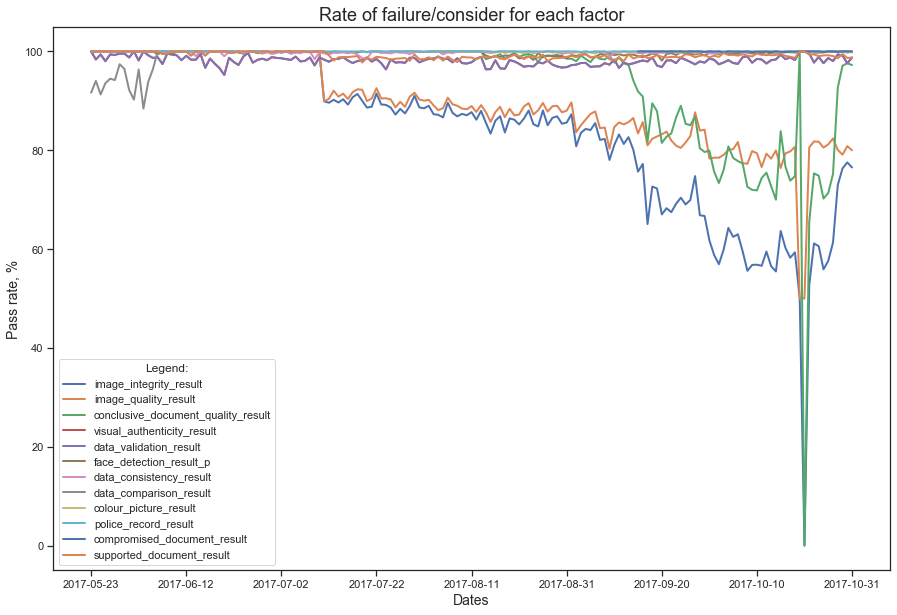

In [145]:
#create chart size for each factor 

rcParams["figure.figsize"] = 15,10

#Control width of lines - 0,5 thick, 2 and more - wide
sns.set(style="ticks", rc={"lines.linewidth": 2})

#If you like the chart on GREY background
#sns.set_style("darkgrid")

#create chart
# Change color palette: here is available pallets: https://www.codecademy.com/articles/seaborn-design-ii#targetText=Seaborn%20has%20six%20variations%20of,bright%20%2C%20dark%20%2C%20and%20colorblind%20
ax = sns.lineplot(y='rate', x = image_integrity_result_p.index, data = image_integrity_result_p, palette="Dark2", legend=False)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax1 = sns.lineplot(y='rate', x = image_quality_result_p.index, data = image_quality_result_p, palette="Dark2", legend=False)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

ax2 = sns.lineplot(y='rate', x = conclusive_document_quality_result_p.index, data = conclusive_document_quality_result_p, palette="Dark2", legend=False)
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))

ax3 = sns.lineplot(y='rate', x = visual_authenticity_result_p.index, data = visual_authenticity_result_p, palette="Dark2", legend=False)
ax3.xaxis.set_major_locator(plt.MaxNLocator(10))

ax4 = sns.lineplot(y='rate', x = data_validation_result_p.index, data = data_validation_result_p, palette="Dark2", legend=False)
ax4.xaxis.set_major_locator(plt.MaxNLocator(10))

ax5 = sns.lineplot(y='rate', x = face_detection_result_p.index, data = face_detection_result_p, palette="Dark2", legend=False)
ax5.xaxis.set_major_locator(plt.MaxNLocator(10))

ax6 = sns.lineplot(y='rate', x = data_consistency_result_p.index, data = data_consistency_result_p, palette="Dark2", legend=False)
ax6.xaxis.set_major_locator(plt.MaxNLocator(10))

ax7 = sns.lineplot(y='rate', x = data_comparison_result_p.index, data = data_comparison_result_p, palette="Dark2", legend=False)
ax7.xaxis.set_major_locator(plt.MaxNLocator(10))

ax7 = sns.lineplot(y='rate', x = colour_picture_result_p.index, data = colour_picture_result_p, palette="Dark2", legend=False)
ax7.xaxis.set_major_locator(plt.MaxNLocator(10))

ax8 = sns.lineplot(y='rate', x = police_record_result_p.index, data = police_record_result_p, palette="Dark2", legend=False)
ax8.xaxis.set_major_locator(plt.MaxNLocator(10))

ax9 = sns.lineplot(y='rate', x = compromised_document_result_p.index, data = compromised_document_result_p, palette="Dark2", legend=False)
ax9.xaxis.set_major_locator(plt.MaxNLocator(10))

ax10 = sns.lineplot(y='rate', x = supported_document_result_p.index, data = supported_document_result_p, palette="Dark2", legend=False)
ax10.xaxis.set_major_locator(plt.MaxNLocator(10))

#set labels for chart
ax.set_title("Rate of failure/consider for each factor", fontsize=18)
ax.set_xlabel("Dates", fontsize=14)
ax.set_ylabel("Pass rate, %", fontsize=14)

plt.legend(title='Legend:', loc='lower left', labels=['image_integrity_result',
                                                     'image_quality_result',
                                                     'conclusive_document_quality_result',
                                                     'visual_authenticity_result',
                                                     'data_validation_result',
                                                     'face_detection_result_p',
                                                     'data_consistency_result',
                                                     'data_comparison_result',
                                                     'colour_picture_result',
                                                     'police_record_result',
                                                     'compromised_document_result',
                                                     'supported_document_result'])

#ax.set(xlim=(125, 140))
ax.figure.savefig('Rate of failure-consider for each factor.png', bbox_inches="tight")

In [ ]:
# Honestly, all the best and happy coding :)